In [67]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Flatten, Dense
from scipy.io import wavfile
from tensorflow.keras import layers

In [2]:
import tensorflow as tf

# Verificar si CUDA está disponible
print("CUDA disponible:", tf.test.is_built_with_cuda())

# Listar los dispositivos físicos GPU disponibles
print("Dispositivos GPU disponibles:", tf.config.list_physical_devices('GPU'))


CUDA disponible: False
Dispositivos GPU disponibles: []


In [1]:
import tensorflow as tf
tf. __version__

'2.16.1'

In [13]:
tf. __version__

'2.16.1'

In [9]:
import keras
keras. __version__

'3.2.1'

In [14]:
keras. __version__

'3.2.1'

In [10]:
tf.sysconfig.get_build_info()

OrderedDict([('is_cuda_build', False),
             ('is_rocm_build', False),
             ('is_tensorrt_build', False),
             ('msvcp_dll_names', 'msvcp140.dll,msvcp140_1.dll')])

In [3]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

The first step is to load the WAV files, use a Python package named Librosa to generate spectrogram images from them, load the spectrograms into memory, and prepare them for use in training a CNN. To aid in this process, we'll define a pair of helper functions for creating spectrograms from WAV files and converting all the WAV files in a specified directory into spectrograms.

cello (cel), clarinet (cla), flute (flu), acoustic guitar (gac), electric guitar (gel), organ (org), piano (pia), saxophone (sax), trumpet (tru), violin (vio), and human singing voice (voi)

# Model_1

In [2]:
# Function create spectrogram from an audio file
def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr) # Generates the mel spectrogram
    log_ms = librosa.power_to_db(ms, ref=np.max) # turns into dB the spectrogram (through log)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

#Function create pngs from wavs iterates through a directory, and for each file, summons create_spectogram to create the image
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

Create PNG files containing spectrograms from all the WAV files in the "Sounds/background" directory.

KeyboardInterrupt: 

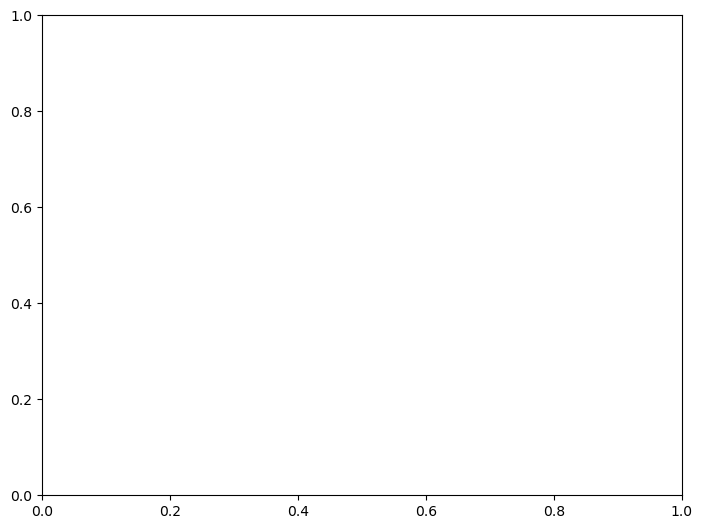

In [3]:
# cello (cel)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\cel', 'Spectrograms/cel')
# clarinet (cla)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\cla', 'Spectrograms/cla')
# flute (flu)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\flu', 'Spectrograms/flu')
# acoustic guitar (gac)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\gac', 'Spectrograms/gac')
# electric guitar (gel)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\gel', 'Spectrograms/gel')
# organ (org)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\org', 'Spectrograms/org')
# piano (pia)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\pia', 'Spectrograms/pia')
# trumpet (tru)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\tru', 'Spectrograms/tru')
# violin (vio)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\vio', 'Spectrograms/vio')
# human singing voice (voi)
create_pngs_from_wavs(r'C:\Users\ivanp\Desktop\New folder\IRMAS-TrainingData\voi', 'Spectrograms/voi')

Define two new helper functions for loading and displaying spectrograms and declare two Python lists — one to store spectrogram images, and another to store class labels.

In [ ]:
# Turns images from a directory into an numpy array and gives it a label, returns list of images and list of labels
def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels
x = []
y = []

In [ ]:
images, labels = load_images_from_path('Spectrograms/cel', 0)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/cla', 1)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/flu', 2)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/gac', 3)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/gel', 4)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/org', 5)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/pia', 6)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/tru', 7)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/vio', 8)
x += images
y += labels

In [ ]:
images, labels = load_images_from_path('Spectrograms/voi', 9)
x += images
y += labels

Split the images and labels into two datasets — one for training, and one for testing. Then divide the pixel values by 255 and one-hot-encode the labels using Keras's to_categorical function.

In [ ]:
cargar el wav en un numpy arrray y hago el slicing


transformada de fourier (como se usa, entender como se calcula, que y por qué)



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
print(x_train_norm.shape)
print(y_train_encoded.shape)
print(x_test_norm.shape)
print(y_test_encoded.shape)

Create model

In [ ]:
model = Sequential()

# 1st layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
#Last layer: REMINDER --> this one the 10 determines the number of labels (classify)
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Train the CNN and save the history object returned by fit in a local variable

In [ ]:
print(x_train_norm.shape)
print(y_train_encoded.shape)
print(x_test_norm.shape)
print(y_test_encoded.shape)

In [ ]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

As we can see, the model overfits, therefore we will try to get an image from a piece of N seconds from the audio, for each audio, train the model and see if the overfitting is lower

# Model_2

In [128]:
# https://stackoverflow.com/questions/16778878/python-write-a-wav-file-into-numpy-float-array 
def wav_to_nparray(input_path):
    files_dir = os.listdir(input_path)
    output = []
    for file in files_dir:
        if file.endswith(".wav"):
            file_path = os.path.join(input_path, file)
            sr, data = wavfile.read(file_path)
            output.append(data)
    return output

In [129]:
#podríamos poner como parámetros de la función el start y end time
def segmentation(audio_file):
    start_time = 2  
    end_time = 3  
    sr = 44100 #frecuencia de muestreo (sampling rate) standard, confirmada con el datas "format sampled at 44.1kHz" 
    start_sample = int(start_time * sr) 
    end_sample = int(end_time * sr)
    segment = audio_file[start_sample:end_sample, :] # 44100 * cuando queremos que empiece y acabe, nos da el segmento de audio que queremos en valores del array
    return segment

In [130]:
a = 44100*2
44100*2

88200

In [131]:
b = 44100*3
44100*3

132300

In [132]:
numeros = list(range(1, 101))

In [133]:
start1 = 2*30
end1 = 3*30

In [134]:
numeros1 = numeros[start1:end1]
print(len(numeros1))

30


In [135]:
b-a

44100

In [136]:
# Representación del segmento de audio
def graph_audio(audio):
    plt.figure(figsize=(18, 3))
    plt.plot(audio[:, 0], label='Channel 1')
    plt.plot(audio[:, 1], label='Channel 2')
    # plt.title('Visualización del Tercer Segundo del Array "prueba"')
    plt.xlabel('Samples') # de 0 a 44100 ya que tomamos un segundo de muestra
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

In [137]:
# We take the lenght of all the files so we make sure we take the same amount of samples when we train the model

def get_folder_lengths(base_path):
    folders_path = os.listdir(base_path)
    folder_lengths = {}

    for folder in folders_path:
        if folder != "README.txt":
            folder_path = os.path.join(base_path, folder)
            folder_contents = os.listdir(folder_path)
            folder_lengths[folder] = len(folder_contents)
    
    return folder_lengths

In [138]:
get_folder_lengths(r"X:\CODING\PROJECTS\AUDIO_PROJECT\New folder\IRMAS-TrainingData")

{'cel': 388,
 'cla': 505,
 'flu': 451,
 'gac': 637,
 'gel': 760,
 'org': 682,
 'pia': 721,
 'sax': 626,
 'tru': 577,
 'vio': 580,
 'voi': 778}

We can see here that the lowest of samples are in the ``cel`` folder, therefore that will determine the number of samples taht we will use to train the model

In [139]:
def segment_audios(input_path, label):
    segmented_track = []
    labels = []
    audios = wav_to_nparray(input_path)
    for i, track in enumerate(audios):
        if i >= 388:
            break
        segmented_track.append(segmentation(track))
        labels.append(label)
    return segmented_track, labels

In [140]:
def process_all_instruments(base_path):
    x = []
    y = []
    
    instruments = os.listdir(base_path)
    
    for label, instrument in enumerate(instruments):
        if instrument != "README.txt":
            instrument_path = os.path.join(base_path, instrument)
            array, label_array = segment_audios(instrument_path, label)
            x += array
            y += label_array
    
    return x, y

In [141]:
x = []
y = []
x, y = process_all_instruments(r"X:\CODING\PROJECTS\AUDIO_PROJECT\New folder\IRMAS-TrainingData")

In [142]:
print(f"len x (samples) = {len(x)}")
print(f"len y (labels) = {len(y)}")

len x (samples) = 4268
len y (labels) = 4268


In [143]:
x[0].shape

(44099, 2)

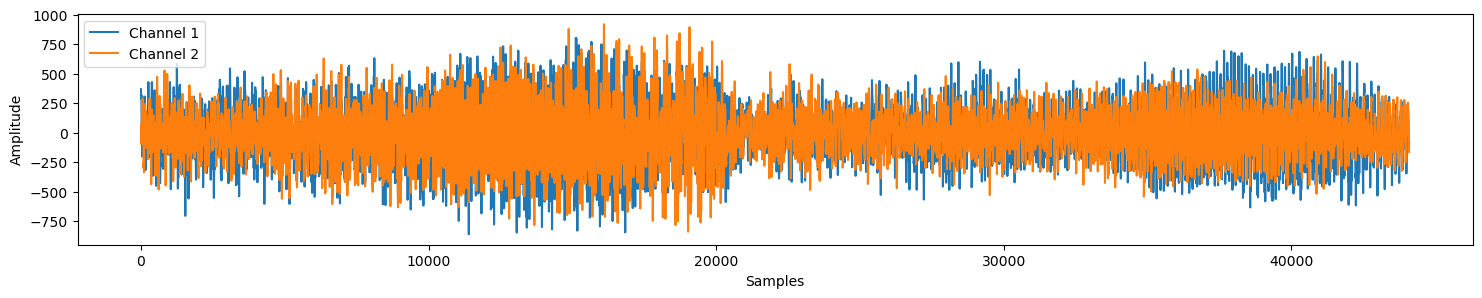

In [144]:
graph_audio(x[0])

In [145]:
len(x[3601])

44099

In [146]:
print("Unique labels:", np.unique(y))

Unique labels: [ 0  1  2  3  4  5  6  8  9 10 11]


In [148]:
# Normalizamos los datos de entrada. Dividir por el máximo valor absoluto (np.max(np.abs(x))) asegura que los datos de audio estén en un rango adecuado para el modelo, que es [-1, 1]
x = x / np.max(np.abs(x))
y = to_categorical(y, num_classes=12)

In [ ]:
# Divide in train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [120]:
x_train.shape

(3201, 44099, 2)

In [121]:
x.shape

(4268, 44099, 2)

In [122]:
# Create model
model = Sequential()

# Adding layers
model.add(layers.Conv1D(32, 20, activation='relu', input_shape=(44099, 2)))  #para img kernel de 5 7 9 suele funcionar. Para audio --> 15 min
model.add(layers.MaxPooling1D(4)) # maxpooling divide entre (N) la muestra. Probar con  3 4 o 5 cada capa

# 50>15>10>5 en las capas

model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(4))

model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(4))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(12, activation='softmax', )) # categorical loss entrophy 


In [123]:
# Compilamos el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 44080, 32)      │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 11020, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 11018, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 2754, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 2752, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 688, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 88064)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     5,636,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,712,812 (21.79 MB)

 Trainable params: 5,712,812 (21.79 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
print(f"x_train = {(x_train.shape)}")
print(f"y_train = {y_train.shape}")
print(f"x_test = {x_test.shape}")
print(f"y_test = {y_test.shape}")

x_train = (3201, 44099, 2)
y_train = (3201, 12, 11, 12)
x_test = (1067, 44099, 2)
y_test = (1067, 12, 11, 12)


In [126]:
print(f"x_train = {len(x_train)}")
print(f"y_train = {len(y_train)}")
print(f"x_test = {len(x_test)}")
print(f"y_test = {len(y_test)}")

x_train = 3201
y_train = 3201
x_test = 1067
y_test = 1067


In [127]:
# Entrenamos el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test)) #ponerle unos 50 epochs  AYDIOMIO

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 12, 11, 12), output.shape=(None, 12)

We have overfitting so we are going to add a dropout layer to the model and see what happens

In [ ]:
from keras.layers import Dropout

# Create model
model = Sequential()

# Adding layers
model.add(layers.Conv1D(32, 20, activation='relu', input_shape=(44099, 2)))
model.add(layers.MaxPooling1D(2))


model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(12, activation='softmax', )) # categorical loss entrophy 

In [ ]:
# Compilamos el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

The quality of the results is not good so we are going to try using L2 regulatization by adding it to the model and see the result

In [ ]:
from keras.regularizers import l2

# Create model
model = Sequential()

# Adding layers
model.add(layers.Conv1D(32, 20, activation='relu', input_shape=(44099, 2),kernel_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(2))


model.add(layers.Conv1D(64, 3, activation='relu',kernel_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(2))

model.add(layers.Conv1D(128, 3, activation='relu',kernel_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(0.01)))

model.add(layers.Dense(128, activation='relu',kernel_regularizer=l2(0.01)))

model.add(layers.Dense(256, activation='relu',kernel_regularizer=l2(0.01)))

model.add(layers.Dense(12, activation='softmax', )) # categorical loss entrophy 

In [ ]:
# Compilamos el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenamos el modelo
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))